# Climate Data Analysis

In [12]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [4]:
#Load climate data from a CSV file
data = pd.read_csv('Marine_CSV_sample.csv')

#Data cleaning and preprocessing
#Remove rows with missing values
data.dropna(inplace = True)

#Convert Time of Observation to a datetime format
data['Time of Observation'] = pd.to_datetime(data['Time of Observation'])

#Select specific columns for analysis
selected_columns = ['Latitude', 'Longitude', 'Ice Accretion On Ship', 'Sea Level Pressure', 'Air Temperature', 'Sea Surface Temperature', 'Wave Height', 'Total Cloud Amount', 'Visibility', 'Wind Direction', 'Wind Speed', 'Time of Observation']

#Extract the selected columns from the data
selected_data = data[selected_columns]

#Statistical analysis
#Calculate mean, median, and standard deviation for each selected column
statistics = selected_data.describe()

# Data Visualization

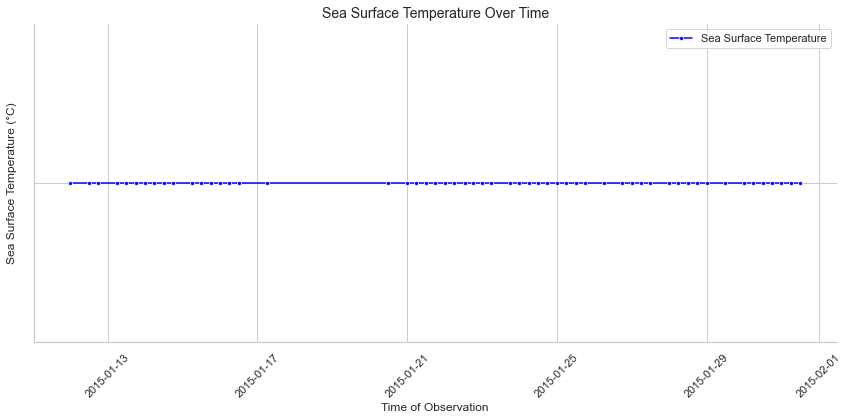

In [6]:
#Time Series Analysis to Identify Trends
#Set the style and context of the plot
sns.set_style("whitegrid")
sns.set_context("notebook")

#Create a line plot with seaborn
plt.figure(figsize = (12, 6))
sns.lineplot(x = selected_data['Time of Observation'], y = selected_data['Sea Surface Temperature'], marker = "o", color = "b", markersize = 4, label = "Sea Surface Temperature")
plt.title('Sea Surface Temperature Over Time', fontsize = 14)
plt.xlabel('Time of Observation', fontsize = 12)
plt.ylabel('Sea Surface Temperature (°C)', fontsize = 12)
plt.xticks(rotation = 45)  #Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

#Add grid lines and customize the plot
sns.despine()
plt.tight_layout()

plt.show()

In [20]:
#Create an enhanced scatter plot of latitude and longitude
plt.figure(figsize=(12, 10))

#Define a color palette for data points
colors = sns.color_palette("coolwarm", as_cmap=True)

#Customize marker size based on wind speed (scaled for visibility)
point_size = selected_data['Wind Speed'] * 2

#Create the scatter plot with enhanced aesthetics
scatter = sns.scatterplot(
    x='Longitude',
    y='Latitude',
    data=selected_data,
    alpha=0.7,
    size=point_size,
    sizes=(20, 200),
    hue='Sea Surface Temperature',  #Color-coding based on temperature
    palette=colors,
    legend='brief',  #Show legend
    edgecolor='k',  #Marker edge color
)

#Add tooltips for data points
for line in range(0, selected_data.shape[0]):
    scatter.text(
        selected_data['Longitude'][line] + 0.01,
        selected_data['Latitude'][line],
        selected_data['Time of Observation'][line].strftime("%Y-%m-%d"),
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold',
    )

#Customize the legend and labels
plt.legend(title='Sea Surface Temperature (°C)')
plt.title('Enhanced Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#Display grid lines
plt.grid(True)

#Show the color bar
cbar = plt.colorbar()
cbar.set_label('Sea Surface Temperature (°C)')

plt.show()

TypeError: 'LinearSegmentedColormap' object is not iterable

<Figure size 864x720 with 0 Axes>

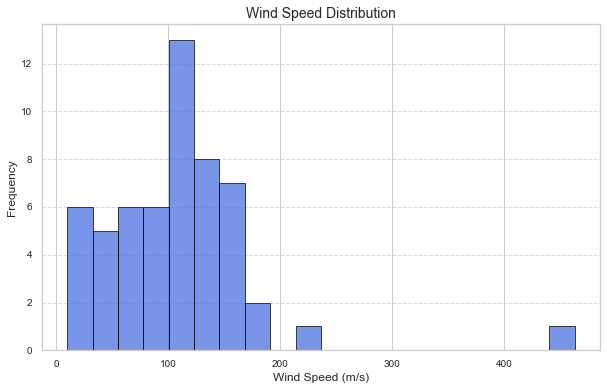

In [21]:
# Create a visually enhanced histogram
plt.figure(figsize=(10, 6))

# Define the number of bins and colors
num_bins = 20
bar_color = 'royalblue'
edge_color = 'k'

# Plot the histogram
plt.hist(selected_data['Wind Speed'], bins=num_bins, color=bar_color, edgecolor=edge_color, alpha=0.7)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Wind Speed Distribution', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

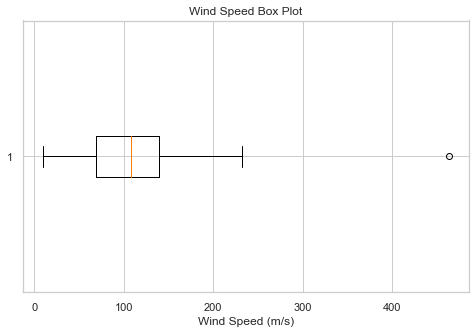

In [23]:
#Box plot for Wind Speed
plt.figure(figsize=(8, 5))
plt.boxplot(selected_data['Wind Speed'], vert = False)
plt.title('Wind Speed Box Plot')
plt.xlabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

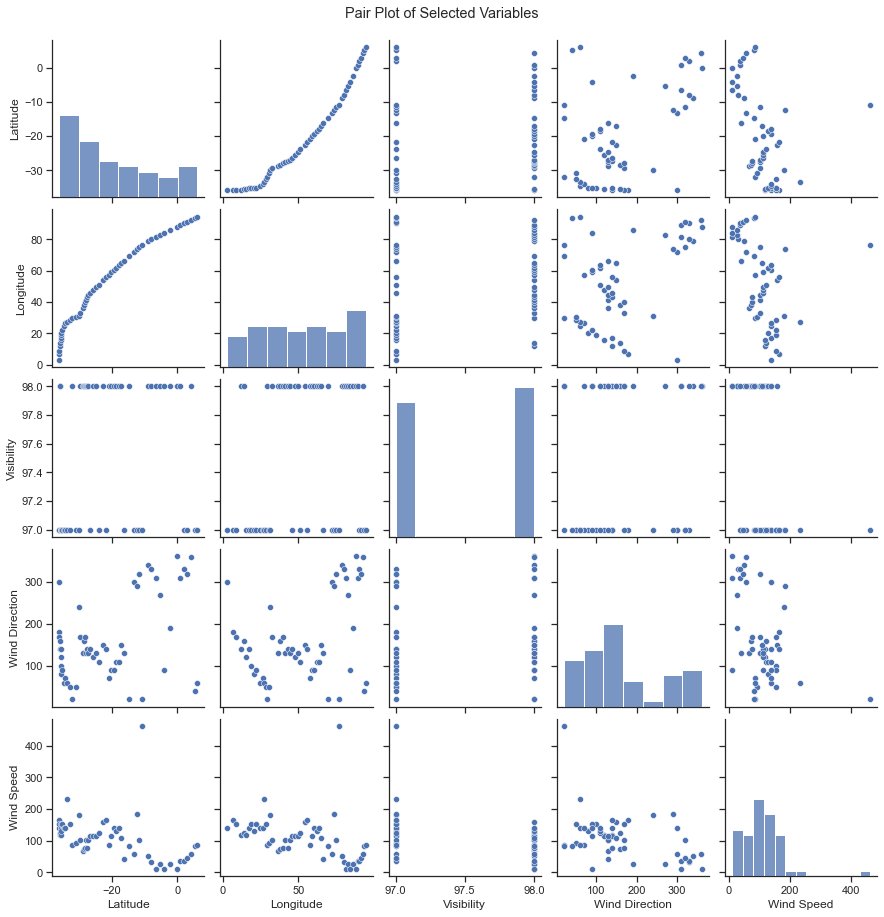

In [25]:
#Pair plot for selected variables
sns.set(style = "ticks")
sns.pairplot(selected_data)
plt.suptitle("Pair Plot of Selected Variables", y = 1.02)
plt.show()

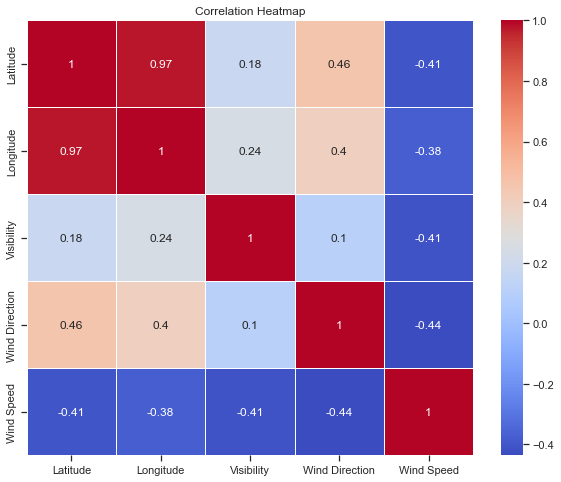

In [26]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#Save the statistics to a CSV file
statistics.to_csv('climate_statistics.csv')

#Save the cleaned data to a new CSV file
selected_data.to_csv('cleaned_climate_data.csv', index = False)